In [1]:
import numpy as np
import pandas as pd
from utils import ImprovedCBR
import matplotlib.pyplot as plt

In [2]:
# del utils

In [2]:
df = pd.read_csv("Dataset/COLIBRI Training cbr_case_dataset Boolean USING.csv", index_col=0)
df.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S26,S27,S28,S29,S30,S31,S32,S33,Diagnosis/Disease,CaseAlias
CaseID,,,,,,,,,,,,,,,,,,,,,
Case_001,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,D1,MAS
Case_002,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,D2,Pseudomonas
Case_003,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,D3,ESC
Case_004,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,D4,"Bloated Abdomen, Waterlogged"
Case_005,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,D5,Vibrio


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Case_001 to Case_032
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S1                 32 non-null     int64 
 1   S2                 32 non-null     int64 
 2   S3                 32 non-null     int64 
 3   S4                 32 non-null     int64 
 4   S5                 32 non-null     int64 
 5   S6                 32 non-null     int64 
 6   S7                 32 non-null     int64 
 7   S8                 32 non-null     int64 
 8   S9                 32 non-null     int64 
 9   S10                32 non-null     int64 
 10  S11                32 non-null     int64 
 11  S12                32 non-null     int64 
 12  S13                32 non-null     int64 
 13  S14                32 non-null     int64 
 14  S15                32 non-null     int64 
 15  S16                32 non-null     int64 
 16  S17                32 non-null     int

In [4]:
df.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S26,S27,S28,S29,S30,S31,S32,S33,Diagnosis/Disease,CaseAlias
CaseID,,,,,,,,,,,,,,,,,,,,,
Case_028,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,D28,Gill Fungus
Case_029,1,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,D29,Costia
Case_030,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,D30,GBD
Case_031,1,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,D31,Ammonia Poisoning
Case_032,1,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,D32,Nitrite Poisoning


# CBR Problem-Solving Technique using OOP Approach

In [5]:
# instantiating the CBR class
cbr_obj = ImprovedCBR(knowldge_base_df=df)

### Displaying the Implemented CBR class documentation

see the "README.md" file also

In [6]:
help(ImprovedCBR)


Help on class CBR_OMOSEYI in module utils:

class CBR_OMOSEYI(builtins.object)
 |  CBR_OMOSEYI(knowldge_base_df: pandas.core.frame.DataFrame)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, knowldge_base_df: pandas.core.frame.DataFrame)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  binary_cosine_similarity(self, vector1, vector2)
 |      Calculates cosine similarity between two binary vectors
 |      
 |      Args:
 |      vector1 (list or numpy array): First binary vetcor
 |      vector2 (list or numpy array): Second binary vetcor
 |      
 |      Returns:
 |      float: Cosine similarity between vectors in range(-1:"not-identical", 1:"identical")
 |  
 |  binary_euclidean_distance(self, vector1, vector2)
 |      Calculates Euclidean distance between two binary vectors
 |      
 |      Args:
 |      vector1 (list or numpy array): First binary vector
 |      vector2 (list or numpy array): Second binary vector
 |      
 |      Returns:
 |      fl

### Separating base-cases from solutions to match similarities against problem-cases

In [7]:
base_cases = df[df.columns[:-2]]
solutions = df[df.columns[-2:]]

problem = list(base_cases.iloc[0].values)

In [8]:
print('Top-5 Existing Cases:\n')
base_cases.head()

Top-5 Existing Cases:



,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33
CaseID,,,,,,,,,,,,,,,,,,,,,
Case_001,1,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Case_002,1,1,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Case_003,1,1,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Case_004,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Case_005,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print('Top-5 Existing Solutions:\n')
solutions.head()

Top-5 Existing Solutions:



,Diagnosis/Disease,CaseAlias
CaseID,,
Case_001,D1,MAS
Case_002,D2,Pseudomonas
Case_003,D3,ESC
Case_004,D4,"Bloated Abdomen, Waterlogged"
Case_005,D5,Vibrio


In [11]:
print(f'New Problem-Case:\n{problem}')

New Problem-Case:
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Calculating the distance scores

In [12]:
distance_scores = cbr_obj.compute_distance_scores(problem=problem, base_cases_df=base_cases, solutions_df=solutions)
distance_scores.head()

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores
CaseID,,,,,
Case_001,D1,MAS,0.00,1.00,1.00
Case_002,D2,Pseudomonas,1.73,0.84,0.73
Case_003,D3,ESC,2.45,0.67,0.50
Case_004,D4,"Bloated Abdomen, Waterlogged",3.16,0.50,0.33
Case_005,D5,Vibrio,2.00,0.75,0.56


### Scaling/standardizing all distance/similairty scores to values in range(0,1) for standardization and interpretation of the 

* Euclidean distance: 
    - `min=0 (identical), max=6 (not-identical)`

    NOTE: `max = sqrt(n)`, where `n` is the total number of all symptoms (33). i.e. 5.7 = 6 (approx.)}

* Cosine similarity: 
    - `min=-1 (not-identical), max=1 (identical)`

* Jaccard similarity: 
    - `min=0 (not-identical), max=1 (identical)`

In [13]:
distance_scores['scaled_euclid_scores'] = distance_scores.euclid_scores.apply(lambda x: cbr_obj.scale_euclid_cosine_jaccard_score(x, metric='euclidean'))
distance_scores['scaled_cosine_scores'] = distance_scores.cosine_scores.apply(lambda x: cbr_obj.scale_euclid_cosine_jaccard_score(x, metric='cosine'))
distance_scores['scaled_jaccard_scores'] = distance_scores.jaccard_scores.apply(lambda x: cbr_obj.scale_euclid_cosine_jaccard_score(x, metric='jaccard'))

distance_scores.head(10)

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores
CaseID,,,,,,,,
Case_001,D1,MAS,0.00,1.00,1.00,1.00,1.00,1.00
Case_002,D2,Pseudomonas,1.73,0.84,0.73,0.71,0.92,0.73
Case_003,D3,ESC,2.45,0.67,0.50,0.59,0.84,0.50
Case_004,D4,"Bloated Abdomen, Waterlogged",3.16,0.50,0.33,0.47,0.75,0.33
Case_005,D5,Vibrio,2.00,0.75,0.56,0.67,0.88,0.56
Case_006,D6,Streptococcus,2.00,0.78,0.64,0.67,0.89,0.64
Case_007,D7,Epithelial Cells,3.46,0.15,0.08,0.42,0.57,0.08
Case_008,D8,BGD,3.61,0.24,0.13,0.40,0.62,0.13
Case_009,D9,Columnaris,2.83,0.50,0.33,0.53,0.75,0.33


### Calculating weighted scores (average of the standardized/scaled scores)

In [14]:
distance_scores['weighted_scores'] = distance_scores[
    [
        'scaled_euclid_scores', 
        'scaled_cosine_scores',
        'scaled_jaccard_scores'
    ]].mean(axis=1).round(2)

distance_scores.head()

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores,weighted_scores
CaseID,,,,,,,,,
Case_001,D1,MAS,0.00,1.00,1.00,1.00,1.00,1.00,1.00
Case_002,D2,Pseudomonas,1.73,0.84,0.73,0.71,0.92,0.73,0.79
Case_003,D3,ESC,2.45,0.67,0.50,0.59,0.84,0.50,0.64
Case_004,D4,"Bloated Abdomen, Waterlogged",3.16,0.50,0.33,0.47,0.75,0.33,0.52
Case_005,D5,Vibrio,2.00,0.75,0.56,0.67,0.88,0.56,0.70


### Getting k-Nearest Problem/Solutions above specified thresh-hold value

- Sorts in descending order of weighted similarity scores
- Retrieves k-best solutions above the threshhold specified, if the len(solutions) >= k, otherwise return retrieved solutions

In [16]:
k=6
thresh_hold=0.65 # value in range [0,1]

cbr_obj.get_best_k_cases(cases_results=distance_scores, k=k, thresh_hold=thresh_hold)

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores,weighted_scores
CaseID,,,,,,,,,
Case_001,D1,MAS,0.00,1.00,1.00,1.00,1.00,1.00,1.00
Case_002,D2,Pseudomonas,1.73,0.84,0.73,0.71,0.92,0.73,0.79
Case_010,D10,CCVD,1.73,0.82,0.70,0.71,0.91,0.70,0.77
Case_006,D6,Streptococcus,2.00,0.78,0.64,0.67,0.89,0.64,0.73
Case_011,D11,VHS,2.00,0.76,0.60,0.67,0.88,0.60,0.72
Case_005,D5,Vibrio,2.00,0.75,0.56,0.67,0.88,0.56,0.70


# Integrated Solution: Integrating all steps

In [17]:
problem = list(df[df.columns[:-2]].iloc[0].values)

final_results = cbr_obj.solve_problem(problem, k=7, thresh_hold=0.75)

Computing Similarity measures (Euclidean, Cosine and Jaccard similarity measures)...
Computing Similarity measures... Done.
Scaling/Standardizing computed similarity measures...
	 Scaling euclidean distance scores ...
	 Scaling euclidean distance scores ... Completed
	 Scaling Cosine-Similarity scores ...
	 Scaling Cosine-Similarity scores ... Completed
	 Scaling Jaccard-Similarity scores ...
	 Scaling Jaccard-Similarity scores ... Completed
Scaling/Standardizing computed similarity measures... Done.
Calculating weighted scores...
Calculating weighted scores... Done.
Retrieving best 7 Solution(s) from Knowledge base, above 0.75 thresh-hold...
Found best 3 Solution(s) from Knowledge base, above 0.75 thresh-hold... Done


In [18]:
final_results

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores,weighted_scores
CaseID,,,,,,,,,
Case_001,D1,MAS,0.00,1.00,1.00,1.00,1.00,1.00,1.00
Case_002,D2,Pseudomonas,1.73,0.84,0.73,0.71,0.92,0.73,0.79
Case_010,D10,CCVD,1.73,0.82,0.70,0.71,0.91,0.70,0.77


### Visualizing the results

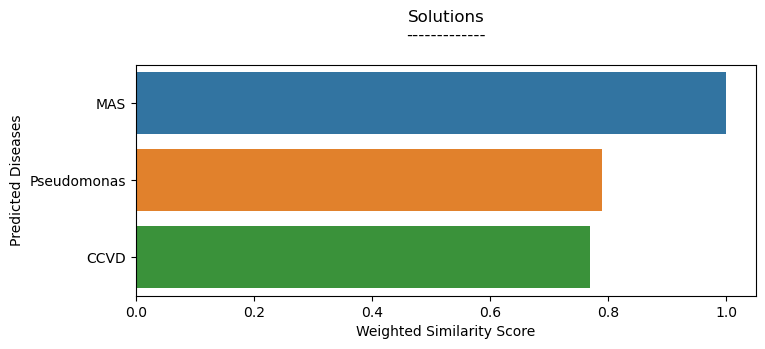

In [19]:
fig = cbr_obj.visualize_results(final_results)